# Assignment 4 - Regression to predict house price
We will apply several regression methods to predict house price by using the feasures of a house. <br>
If you need some motivation to do this task, see this <br>
a similar dataset on https://www.kaggle.com/c/zillow-prize-1 ($1,200,000 award)
### This is a guided-task:
The assignment is a complex task, not easy for beginners like you. <br>
Doing a real application like this is much better than doing many simple tasks using simple datasets <br>
You will see the output of a code cell and then figure out the code in that cell. <br>
In each code cell, there are instructions to help you. <br>
This is a very efficient and effective way to learn how to program with sk-learn <br>
You will do programming after you see "Your work begins here"

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Load the training and test datasets
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [2]:
data_train = pd.read_csv("housing_train.csv")
data_test = pd.read_csv("housing_test.csv")
data_test_y = pd.read_csv("housing_test_y.csv")
data_test['SalePrice']=data_test_y['SalePrice']
data_train['train']=1
data_test['train']=0
#combine data_train, data_test so that we can 'clean' them together
data = pd.concat([data_train, data_test], axis=0, sort=False)
print('data_train.shape', data_train.shape)
print('data_test.shape', data_test.shape)
print('data.shape', data.shape)

data_train.shape (1460, 82)
data_test.shape (1459, 82)
data.shape (2919, 82)


In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,1


the regression target/output is SalePrice

In [4]:
data.head().SalePrice

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

## Handle missing values (NaN and None)
show the missing values for each feature

In [5]:
#show the missing values in a table
Missing = pd.concat([data_train.isnull().sum(), data_test.isnull().sum()], axis=1,
                    keys=['Train', 'Test'],sort=False)
Missing[Missing.sum(axis=1) > 0]

,Train,Test
MSZoning,0,4
LotFrontage,259,227
Alley,1369,1352
Utilities,0,2
Exterior1st,0,1
Exterior2nd,0,1
MasVnrType,8,16
MasVnrArea,8,15
BsmtQual,37,44
BsmtCond,37,45


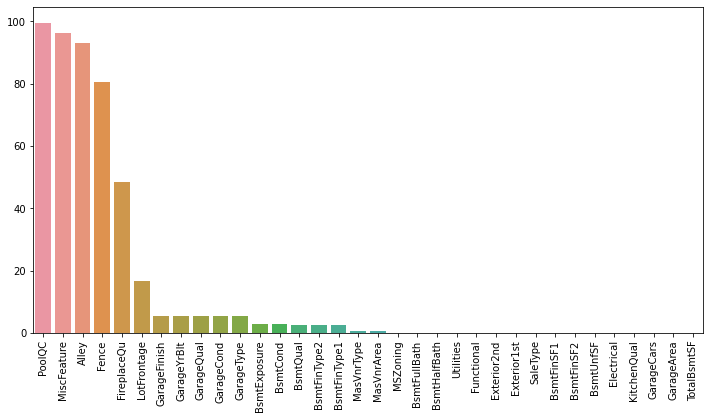

In [6]:
#show the missing values in a plot
data_missing = (data.isnull().sum(axis=0)/data.shape[0]) * 100
data_missing = data_missing.drop(data_missing[data_missing == 0].index).sort_values(ascending=False)
plt.figure(figsize=(12, 6))
plt.xticks(rotation="90")
sns.barplot(x=data_missing.index, y=data_missing)

From the figure, we see that nearly 100% values of the feature/column 'PoolQC' are missing <br>
We can simply delete these features (drop these columns from the table) of which >=50% values are missing

In [7]:
feature_drop = data_missing[data_missing >=50].index
feature_drop

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], dtype='object')

In [8]:
#drop the columns
data=data.drop(columns=feature_drop)
#drop Id
data=data.drop(columns='Id')

In [9]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,208500.0,1
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,181500.0,1
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,223500.0,1
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,140000.0,1
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,250000.0,1


For those features with < 50% missing values, we can use impute methods. <br>
Missing numerical values can be imputed with a constant value, or some statistics (mean, median or most frequent) of each column in which the missing values are located. <br>
Missing categorical/non-numeric values can be imputed with the most frequent category, or a new category-'nothing' <br>
sk-learn has `KNNImputer` method that you may try.

In [10]:
numerical_column=[]
categorical_column=[]
for c in data.columns:
    v=data[c]
    v=v[~v.isnull()]
    if data[c].dtype == np.dtype('O'): # non-numeric values       
        #data[c]=data[c].fillna(v.value_counts().index[0]) # the most frequent category
        data[c]=data[c].fillna('nothing') # a new category         
        categorical_column.append(c)
    else: # numeric 
        if c != 'train' and c != 'SalePrice':
            data[c]=data[c].fillna(v.median()) 
        numerical_column.append(c)        

check if there is any missing value

In [11]:
data[data.isnull().any(axis=1)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train


convert categorical values to numerical values using one-hot encoding <br>
note: there are other methods to encode categorical values

In [12]:
data=pd.get_dummies(data, columns=categorical_column)
data.shape

(2919, 296)

In [13]:
#the table has many new columns
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_nothing,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,0,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,0,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,0,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,0,0,0,0,0,1,0


### get training data and test data from `data`

In [14]:
data_train = data[data['train']==1]
X_train=data_train.drop(columns=['SalePrice', 'train']).values
Y_train=data_train['SalePrice'].values

In [15]:
X_train.dtype

dtype('float64')

In [16]:
X_train.shape

(1460, 294)

In [17]:
Y_train.dtype

dtype('float64')

In [18]:
data_test = data[data['train']==0]
X_test=data_test.drop(columns=['SalePrice', 'train']).values
Y_test=data_test['SalePrice'].values

### show the histograms of prices in the training set and test set

Text(0.5, 1.0, 'histogram of SalePrice in training set')

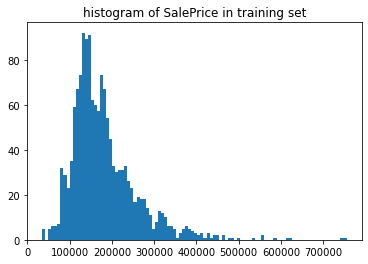

In [19]:
fig, ax = plt.subplots()
ax.hist(data_train.SalePrice.values, bins=100);
ax.set_title('histogram of SalePrice in training set')

Text(0.5, 1.0, 'histogram of SalePrice in test set')

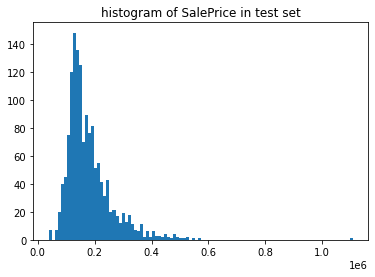

In [20]:
fig, ax = plt.subplots()
ax.hist(data_test.SalePrice.values, bins=100);
ax.set_title('histogram of SalePrice in test set')

# Your work begins here

### (1) LinearRegression model (Linear)

In [21]:
#define a linear regression model using LinearRegression
#train/fit the model on the training set
#make predictions on the training and test set


show the training result

MSE=432903814.89901304, MAE=13380.819249134816, MAPE=0.07889927660259582


(0.0, 1000000.0, 0.0, 1000000.0)

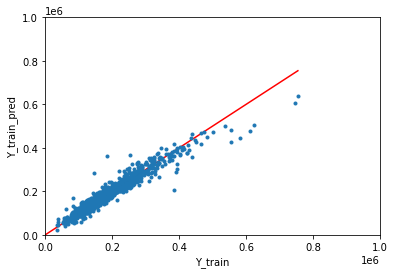

In [22]:
#calculate and print MSE, MAE and MAPE using predictions on training set
#then plot Y_train vs Y_train_pred (blue dots) and the 45-degree line (red)


show the test result

MSE=443564874.6173431, MAE=11916.27992821632, MAPE=0.07244159184619076


(0.0, 1000000.0, 0.0, 1000000.0)

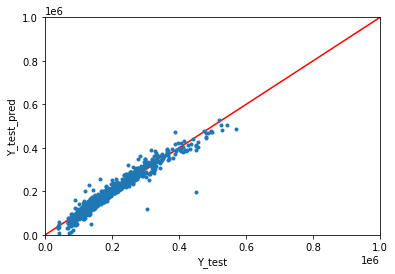

In [23]:
#calculate and print MSE, MAE and MAPE using predictions on test set
#then plot Y_test vs Y_test_pred (blue dots) and the 45-degree line (red)


### (2) nonlinear model: KNeighborsRegressor (KNN)

In [24]:
#define a KNN model using KNeighborsRegressor
#set n_neighbors=5
#train/fit the model on the training set
#make predictions on the training and test set


show the training result

MSE=1354710184.3804932, MAE=23249.926301369866, MAPE=0.1364011754648816


(0.0, 1000000.0, 0.0, 1000000.0)

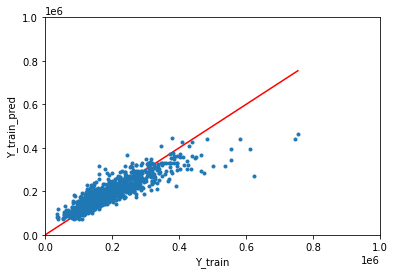

In [25]:
#calculate and print MSE, MAE and MAPE using predictions on training set
#then plot Y_train vs Y_train_pred (blue dots) and the 45-degree line (red)


show the test result

MSE=1918276961.5553465, MAE=25973.916404203963, MAPE=0.15209840378677697


(0.0, 1000000.0, 0.0, 1000000.0)

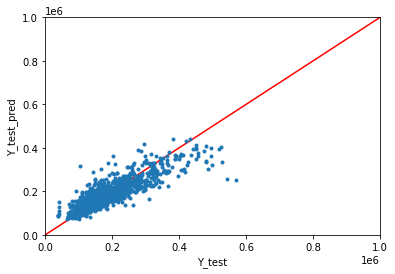

In [26]:
#calculate and print MSE, MAE and MAPE using predictions on test set
#then plot Y_test vs Y_test_pred (blue dots) and the 45-degree line (red)


### (3) nonlinear model:  RandomForestRegressor  (RF)

In [27]:
#define a random forest model using RandomForestRegressor
#set n_estimators=100, max_depth=20, random_state=0
#train/fit the model on the training set
#make predictions on the training and test set


show the training result

MSE=123007238.12766577, MAE=6576.597177611581, MAPE=0.03808244940576383


(0.0, 1000000.0, 0.0, 1000000.0)

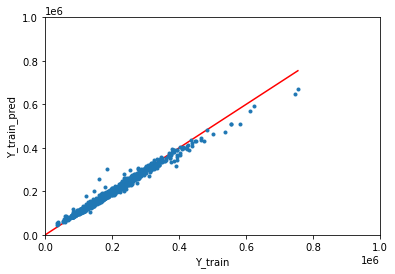

In [28]:
#calculate and print MSE, MAE and MAPE using predictions on training set
#then plot Y_train vs Y_train_pred (blue dots) and the 45-degree line (red)


show the test result

MSE=600643027.7173524, MAE=10581.38178894092, MAPE=0.05956198577838548


(0.0, 1000000.0, 0.0, 1000000.0)

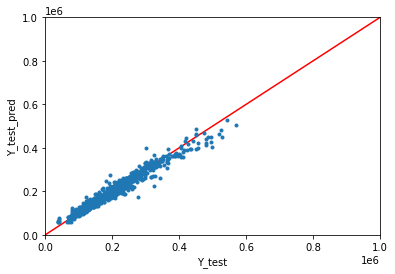

In [29]:
#calculate and print MSE, MAE and MAPE using predictions on test set
#then plot Y_test vs Y_test_pred (blue dots) and the 45-degree line (red)


### make a table to show the performance of the three models on the test set
table is pandas DataFrame

In [30]:
#make a pandas dataframe using MSE, MAE, MAPE values on the test set
#column names are 'MSE', 'MAE', 'MAPE'
#row names are 'Linear', 'KNN', 'RF'



In [31]:
table

,MSE,MAE,MAPE
Linear,4.435649e+08,11916.279928,0.072442
KNN,1.918277e+09,25973.916404,0.152098
RF,6.006430e+08,10581.381789,0.059562


from the table, we can see that random forest (RF) is the best (MAPE is the smallest) <br>
To futher improve the performance, you may need to find the optimal hyper parameters using training-validation (NOT required).